In [ ]:
# importing libraries and dependencies

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import ipdb
import scipy
import math
from itertools import combinations

The following function getMatches() uses Lowe ratio to eliminate bad matches, here the ratio is 0.7 based on the pdf plot in the paper

In [71]:
def getMatches(kIndMat, kDistMat):
    goodMatches = []
    for i in range(len(kDistMat)):
        if (kDistMat[i, 0] < 0.7*kDistMat[i, 1]):
            goodMatches.append((i, kIndMat[i, 0]))
#     print(goodMatches)
    return goodMatches

In [46]:
def Euclidean(mat1, mat2):
    dist = np.zeros((len(mat1),len(mat2)), np.float32)
    for i in range(len(mat1)):
        clonedMat = np.array([mat1[i],]*len(mat2))
        diffMat = np.subtract(mat2, clonedMat)
        squaredMat = np.square(diffMat)
        sqDistanceMat = squaredMat.sum(axis=1)
        dist[i] = np.sqrt(sqDistanceMat)
    
    return dist

In [65]:
def findKnn(distMat, k):
    kMinIndices = np.argpartition(distMat, k, axis = 1)[:,:k]
#     print (kMinIndices)
    kMinDist = distMat[np.arange(distMat.shape[0])[:,None], kMinIndices]
#     print(kMinDist)
    return kMinIndices, kMinDist

In [4]:
# function for getting the key features and their descriptors
def getFeatures(img):
    sift = cv2.xfeatures2d.SIFT_create()
    #finding the key points and descriptors
    keyPoints, descriptors = sift.detectAndCompute(img, None)
    return keyPoints, descriptors

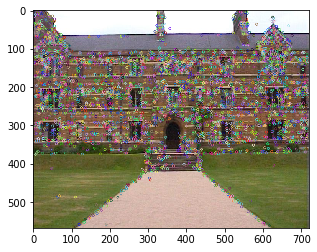

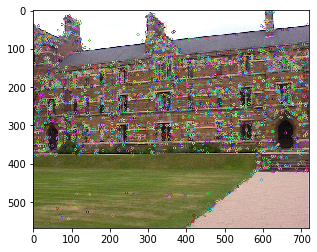

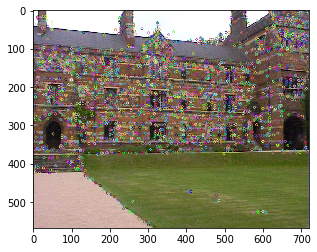

In [5]:
centerImg = cv2.imread('keble_b.jpg', 1)
leftImg = cv2.imread('keble_a.jpg', 1)
rightImg = cv2.imread('keble_c.jpg', 1)

#getting the features and descriptors for each image
keyCenter, desCenter = getFeatures(centerImg)
keyLeft, desLeft = getFeatures(leftImg)
keyRight, desRight = getFeatures(rightImg)
plt.imshow(cv2.cvtColor(cv2.drawKeypoints(centerImg, keyCenter, None), cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(cv2.drawKeypoints(leftImg, keyLeft, None), cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(cv2.drawKeypoints(rightImg, keyRight, None), cv2.COLOR_BGR2RGB))
plt.show()

Calculate the euclidean distances from each feature descriptor in 1 image with every feauture in other image

In [47]:
#Do not run multiple times
distanceMat = Euclidean(desCenter, desLeft)
print(distanceMat)

[[544.71    558.41205 493.35788 ... 583.82104 592.0718  475.5376 ]
 [504.7742  482.5184  463.84265 ... 600.7437  595.9857  534.4174 ]
 [541.8062  497.05835 535.213   ... 517.11505 495.0212  551.9792 ]
 ...
 [592.36646 502.40323 577.4539  ... 391.0192  476.3402  511.50073]
 [581.24866 613.41583 580.1095  ... 534.89624 446.62064 571.7823 ]
 [436.1181  611.36566 515.83136 ... 564.5184  482.8737  575.85065]]


In [66]:
knnIndex, knnDist = findKnn(distanceMat, 2)

In [76]:
matchedFeaturesInd = getMatches(knnIndex, knnDist)
centerMatch = []
leftMatch = []
for i, pair in enumerate(matchedFeaturesInd):
    centerMatch.append(keyCenter[pair[0]])
    leftMatch.append(keyCenter[pair[1]]) 

matchedFeaturesInd[0][0]

1

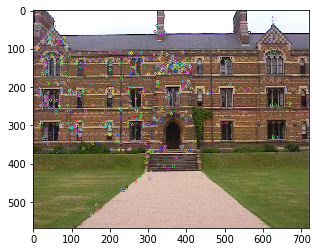

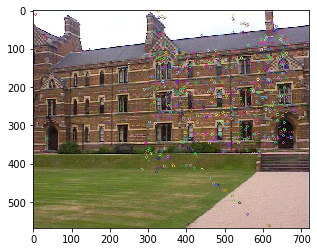

In [81]:
plt.imshow(cv2.cvtColor(cv2.drawKeypoints(centerImg, centerMatch, None), cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(cv2.drawKeypoints(leftImg, leftMatch, None), cv2.COLOR_BGR2RGB))
plt.show()